# Purpose of Analysis:
Develop a pricing model that predicts the prices of men’s and women’s shoes based on relevant features like brands, merchant, prices, sale conditions etc. 
### Data Set:
This is a list of over 19,000 women's and men's shoes and their product information provided by Datafiniti's Product Database. The dataset includes shoe name, brand, price, and more. Each shoe will have an entry for each price found for it and some shoes may have multiple entries.

### Main Objectives: 
- Load and explore the data sets for men and women's shoes to determine which columns are important for our analysis.
- Remove unneccessary columns, extract, data to new columns.
- Clean and inspect data and save cleaned file for Principal component analysis, price prediction modeling and Tableau analysis and dashboard visualizations.

## Step 1a. : Exploring the dataset

Each dataset (women and men) contains 48 columns and since our focus is on price prediction, we will be removing the columns that aren't needed, transforming needed columns and creating new columns for our model. 

In [37]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

df_women = pd.read_csv('7003_1.csv', encoding='latin1',low_memory=False, index_col=False)
df_men = pd.read_csv('7004_1.csv', encoding='latin1',low_memory=False, index_col=False)

In [38]:
df_women.head()

,id,asins,brand,categories,colors,count,dateAdded,dateUpdated,descriptions,dimension,ean,features,flavors,imageURLs,isbn,keys,manufacturer,manufacturerNumber,merchants,name,prices.amountMin,prices.amountMax,prices.availability,prices.color,prices.condition,prices.count,prices.currency,prices.dateAdded,prices.dateSeen,prices.flavor,prices.isSale,prices.merchant,prices.offer,prices.returnPolicy,prices.shipping,prices.size,prices.source,prices.sourceURLs,prices.warranty,quantities,reviews,sizes,skus,sourceURLs,upc,websiteIDs,weight
0,AVpfBXx21cnluZ0-cKxs,NaN,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes","Blue,Multicolor",NaN,2016-11-11T09:49:00Z,2016-11-11T09:49:00Z,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""sourceU...",NaN,NaN,"[{""key"":""Season"",""value"":[""All-Season""]},{""key...",NaN,https://i5.walmartimages.com/asr/e04c07b2-5222...,NaN,zoot/z130103201090,Zoot,Z130103201090,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""name"":""...",Zoot Tt Trainer 2.0 Round Toe Synthetic Sne...,71.99,71.99,NaN,NaN,NaN,NaN,USD,2016-11-11T09:49:00Z,2016-11-02T00:00:00Z,NaN,TRUE,NaN,CLEARANCE USD 178.01,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN,NaN,NaN,"10,9",NaN,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN,NaN,NaN
1,AVpfBXx21cnluZ0-cKxs,NaN,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes","Blue,Multicolor",NaN,2016-11-11T09:49:00Z,2016-11-11T09:49:00Z,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""sourceU...",NaN,NaN,"[{""key"":""Season"",""value"":[""All-Season""]},{""key...",NaN,https://i5.walmartimages.com/asr/e04c07b2-5222...,NaN,zoot/z130103201090,Zoot,Z130103201090,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""name"":""...",Zoot Tt Trainer 2.0 Round Toe Synthetic Sne...,250,250,NaN,NaN,new,NaN,USD,2016-11-11T09:49:00Z,2016-10-27T00:00:00Z,NaN,FALSE,ApparelSave - Walmart.com,CLEARANCE USD 178.01,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN,NaN,NaN,"10,9",NaN,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN,NaN,NaN
2,AVpfBXx21cnluZ0-cKxs,NaN,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes","Blue,Multicolor",NaN,2016-11-11T09:49:00Z,2016-11-11T09:49:00Z,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""sourceU...",NaN,NaN,"[{""key"":""Season"",""value"":[""All-Season""]},{""key...",NaN,https://i5.walmartimages.com/asr/e04c07b2-5222...,NaN,zoot/z130103201090,Zoot,Z130103201090,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""name"":""...",Zoot Tt Trainer 2.0 Round Toe Synthetic Sne...,75.99,75.99,NaN,NaN,new,NaN,USD,2016-11-11T09:49:00Z,2016-10-27T00:00:00Z,NaN,TRUE,ApparelSave - Walmart.com,CLEARANCE USD 174.01,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN,NaN,NaN,"10,9",NaN,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN,NaN,NaN
3,AVpfBXx21cnluZ0-cKxs,NaN,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes","Blue,Multicolor",NaN,2016-11-11T09:49:00Z,2016-11-11T09:49:00Z,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""sourceU...",NaN,NaN,"[{""key"":""Season"",""value"":[""All-Season""]},{""key...",NaN,https://i5.walmartimages.com/asr/e04c07b2-5222...,NaN,zoot/z130103201090,Zoot,Z130103201090,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""name"":""...",Zoot Tt Trainer 2.0 Round Toe Synthetic Sne...,79.98,79.98,NaN,NaN,new,NaN,USD,2016-11-11T09:49:00Z,2016-11-09T00:00:00Z,NaN,TRUE,ApparelSave - Walmart.com,CLEARANCE USD 170.02,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN,NaN,NaN,"10,9",NaN,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN,NaN,NaN
4,AVpfEqFRLJeJML431x7w,NaN,Wild Pair,"Shoes,Women's Shoes,Clothing,All Women's Shoes",Brown,NaN,2016-11-16T12:56:36Z,2016-11-16T12:56:36Z,"[{""dateSeen"":[""2016-11-16T12:56:36Z""],""sourceU...",NaN,7.631810e+11,"[{""key"":""Heel Height"",""value"":[""High (3 in. an...",NaN,https://i5.walmartimages.com/asr/8b2c73f5-939f...,NaN,"wildpair/colfaxcog,0763181233352,763181233352",Wild Pair,COLFAX-COG,"[{""dateSeen"":[""2016-11-16T12:56:36Z""],""name"":""...",Wild Pair Colfax 

In [39]:
df_men.head()

,id,asins,brand,categories,colors,count,dateAdded,dateUpdated,descriptions,dimension,ean,features,flavors,imageURLs,isbn,keys,manufacturer,manufacturerNumber,merchants,name,prices.amountMin,prices.amountMax,prices.availability,prices.color,prices.condition,prices.count,prices.currency,prices.dateAdded,prices.dateSeen,prices.flavor,prices.isSale,prices.merchant,prices.offer,prices.returnPolicy,prices.shipping,prices.size,prices.source,prices.sourceURLs,prices.warranty,quantities,reviews,sizes,skus,sourceURLs,upc,websiteIDs,weight
0,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,6.993020e+11,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",NaN,https://i5.walmartimages.com/asr/13ac3d61-003c...,NaN,"josmo/8190wnavy75,699302044036,0699302044036",NaN,8190-W-NAVY-7.5,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""name"":""...","Josmo 8190 Plain Infant Walking Shoes, Navy - ...",39.89,39.89,NaN,NaN,NaN,NaN,USD,2016-11-07T00:45:12Z,2016-11-05T00:00:00Z,NaN,TRUE,NaN,REDUCED USD 12.10,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.99302E+11,NaN,NaN
1,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,6.993020e+11,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",NaN,https://i5.walmartimages.com/asr/13ac3d61-003c...,NaN,"josmo/8190wnavy75,699302044036,0699302044036",NaN,8190-W-NAVY-7.5,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""name"":""...","Josmo 8190 Plain Infant Walking Shoes, Navy - ...",51.99,51.99,NaN,NaN,new,NaN,USD,2016-11-07T00:45:12Z,2016-11-05T00:00:00Z,NaN,FALSE,UnbeatableSale - Walmart.com,REDUCED USD 12.10,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.99302E+11,NaN,NaN
2,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-5844/...,NaN,servusbyhoneywell/zsr101blmlg,NaN,ZSR101BLMLG,"[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""...",Servus By Honeywell Shoe Studs Zsr101blmlg,40.02,40.02,NaN,NaN,new,NaN,USD,2016-06-14T04:29:57Z,2016-03-08T00:00:00Z,NaN,FALSE,SIM Supply Inc - Walmart.com,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN
3,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-5844/...,NaN,servusbyhoneywell/zsr101blmlg,NaN,ZSR101BLMLG,"[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""...",Servus By Honeywell Shoe Studs Zsr101blmlg,50.31,50.31,NaN,NaN,new,NaN,USD,2016-06-14T04:29:57Z,2015-11-30T00:00:00Z,NaN,FALSE,SIM Supply Inc - Walmart.com,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN
4,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-5844/...,NaN,servusbyhoneywell/zsr101blmlg,NaN,ZSR101BLMLG,"[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""...",

In [40]:
df_women.columns, df_men.columns, df_women.shape, df_men.shape

(Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateAdded',
        'dateUpdated', 'descriptions', 'dimension', 'ean', 'features',
        'flavors', 'imageURLs', 'isbn', 'keys', 'manufacturer',
        'manufacturerNumber', 'merchants', 'name', 'prices.amountMin',
        'prices.amountMax', 'prices.availability', 'prices.color',
        'prices.condition', 'prices.count', 'prices.currency',
        'prices.dateAdded', 'prices.dateSeen', 'prices.flavor', 'prices.isSale',
        'prices.merchant', 'prices.offer', 'prices.returnPolicy',
        'prices.shipping', 'prices.size', 'prices.source', 'prices.sourceURLs',
        'prices.warranty', 'quantities', 'reviews', 'sizes', 'skus',
        'sourceURLs', 'upc', 'websiteIDs', 'weight'],
       dtype='object'),
 Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateAdded',
        'dateUpdated', 'descriptions', 'dimension', 'ean', 'features',
        'flavors', 'imageURLs', 'isbn', 'keys', 'manufacturer',

Both datasets have identical columns so I will be performing the same operations on each.

### Investigatng Null values

In [41]:
# Count null values for each column in df_women and df_men
null_counts_women = df_women.isnull().sum()
null_counts_men = df_men.isnull().sum()

# Combine the null counts into a single DataFrame for comparison
null_comparison = pd.DataFrame({
    'Column': null_counts_women.index,
    'Nulls_in_Women': null_counts_women.values,
    'Nulls_in_Men': null_counts_men[null_counts_women.index].values  # Match columns by name
})

# Set the column name as the index for better readability
null_comparison.set_index('Column', inplace=True)

print(null_comparison)

#Use a more readable format with Jupyter Notebooks
null_comparison.style.format(na_rep='-', precision=0).background_gradient(cmap='viridis')

                     Nulls_in_Women  Nulls_in_Men
Column                                           
id                                0             0
asins                         16837         16816
brand                           633           258
categories                        0             0
colors                         7156          8339
count                         19045         19387
dateAdded                         0             0
dateUpdated                       0             0
descriptions                   8265          9483
dimension                     16627         16396
ean                            9229          9388
features                       4937          5390
flavors                       19045         19387
imageURLs                      1205          1045
isbn                          19045         19387
keys                              0             0
manufacturer                  10389         12688
manufacturerNumber             3142          4262


,Nulls_in_Women,Nulls_in_Men
Column,,
id,0,0
asins,16837,16816
brand,633,258
categories,0,0
colors,7156,8339
count,19045,19387
dateAdded,0,0
dateUpdated,0,0
descriptions,8265,9483


#### visualizing null values

<Axes: >

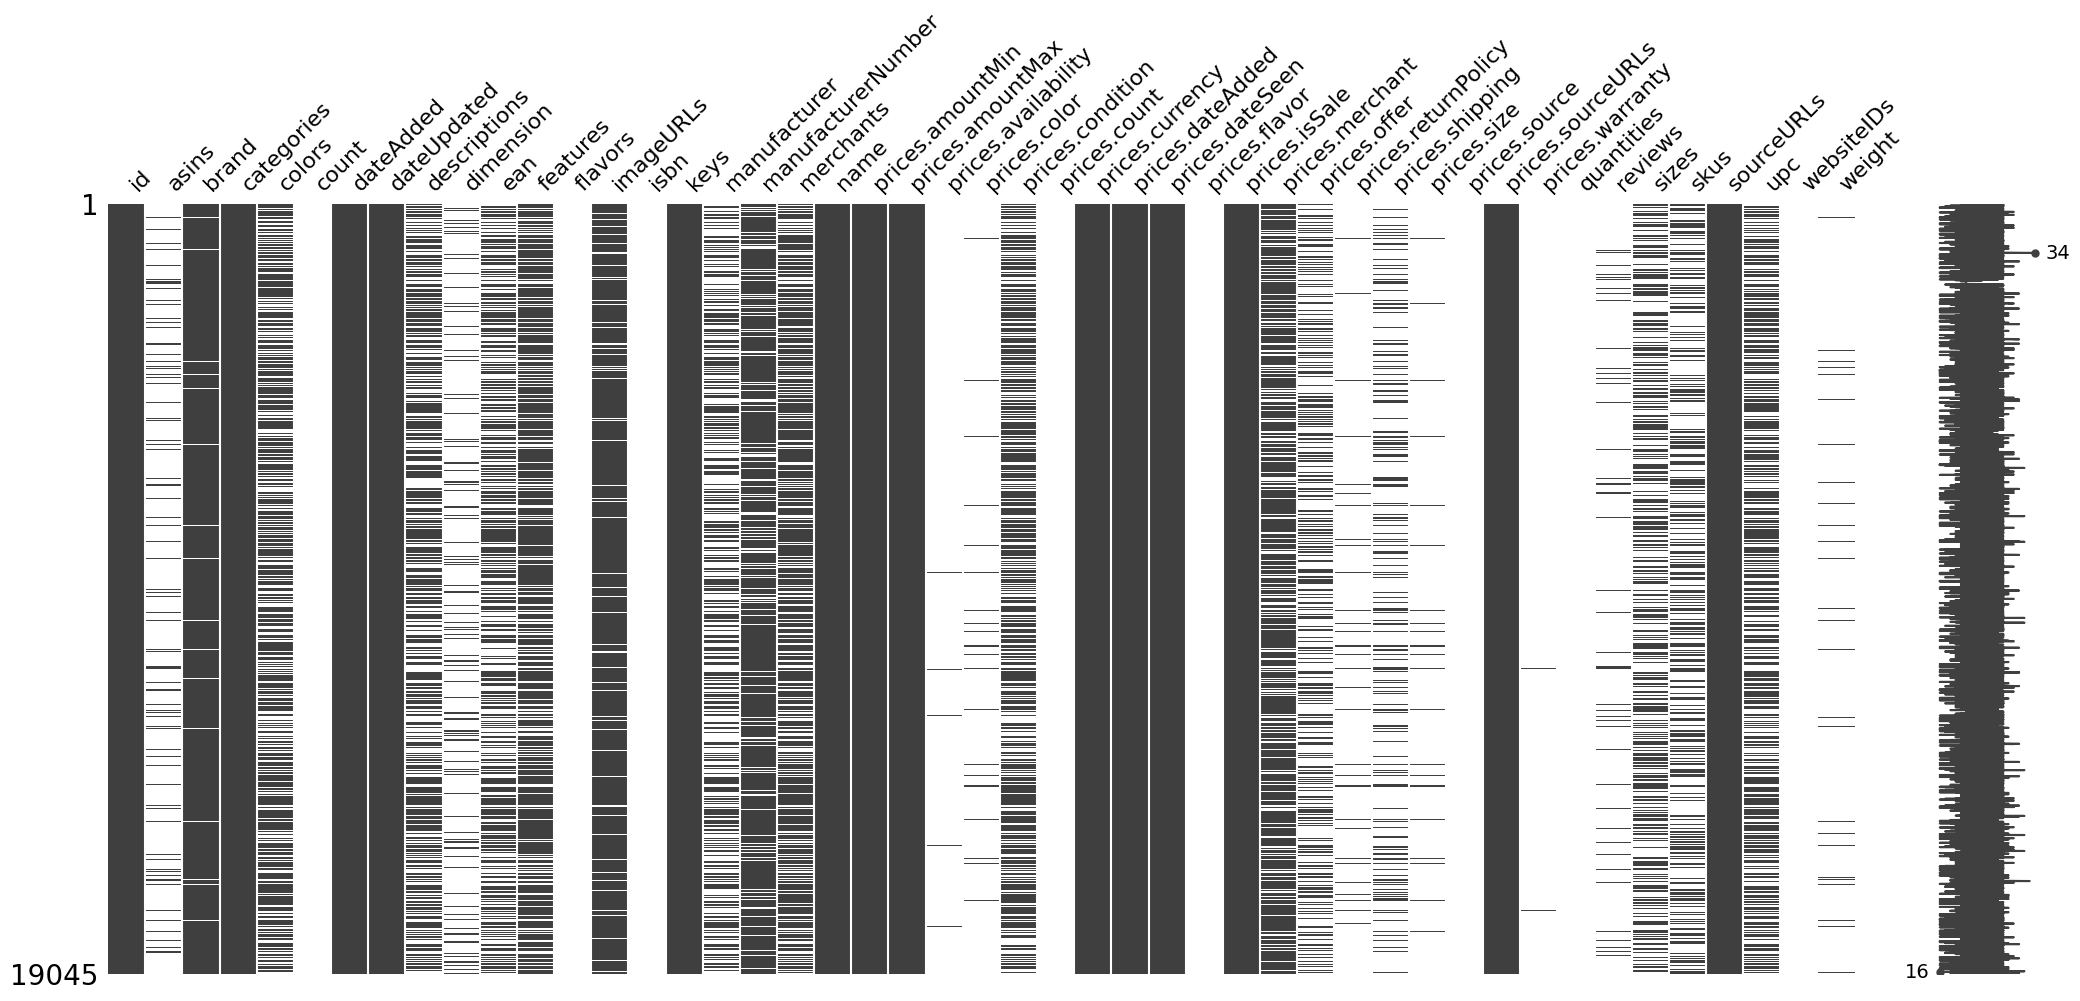

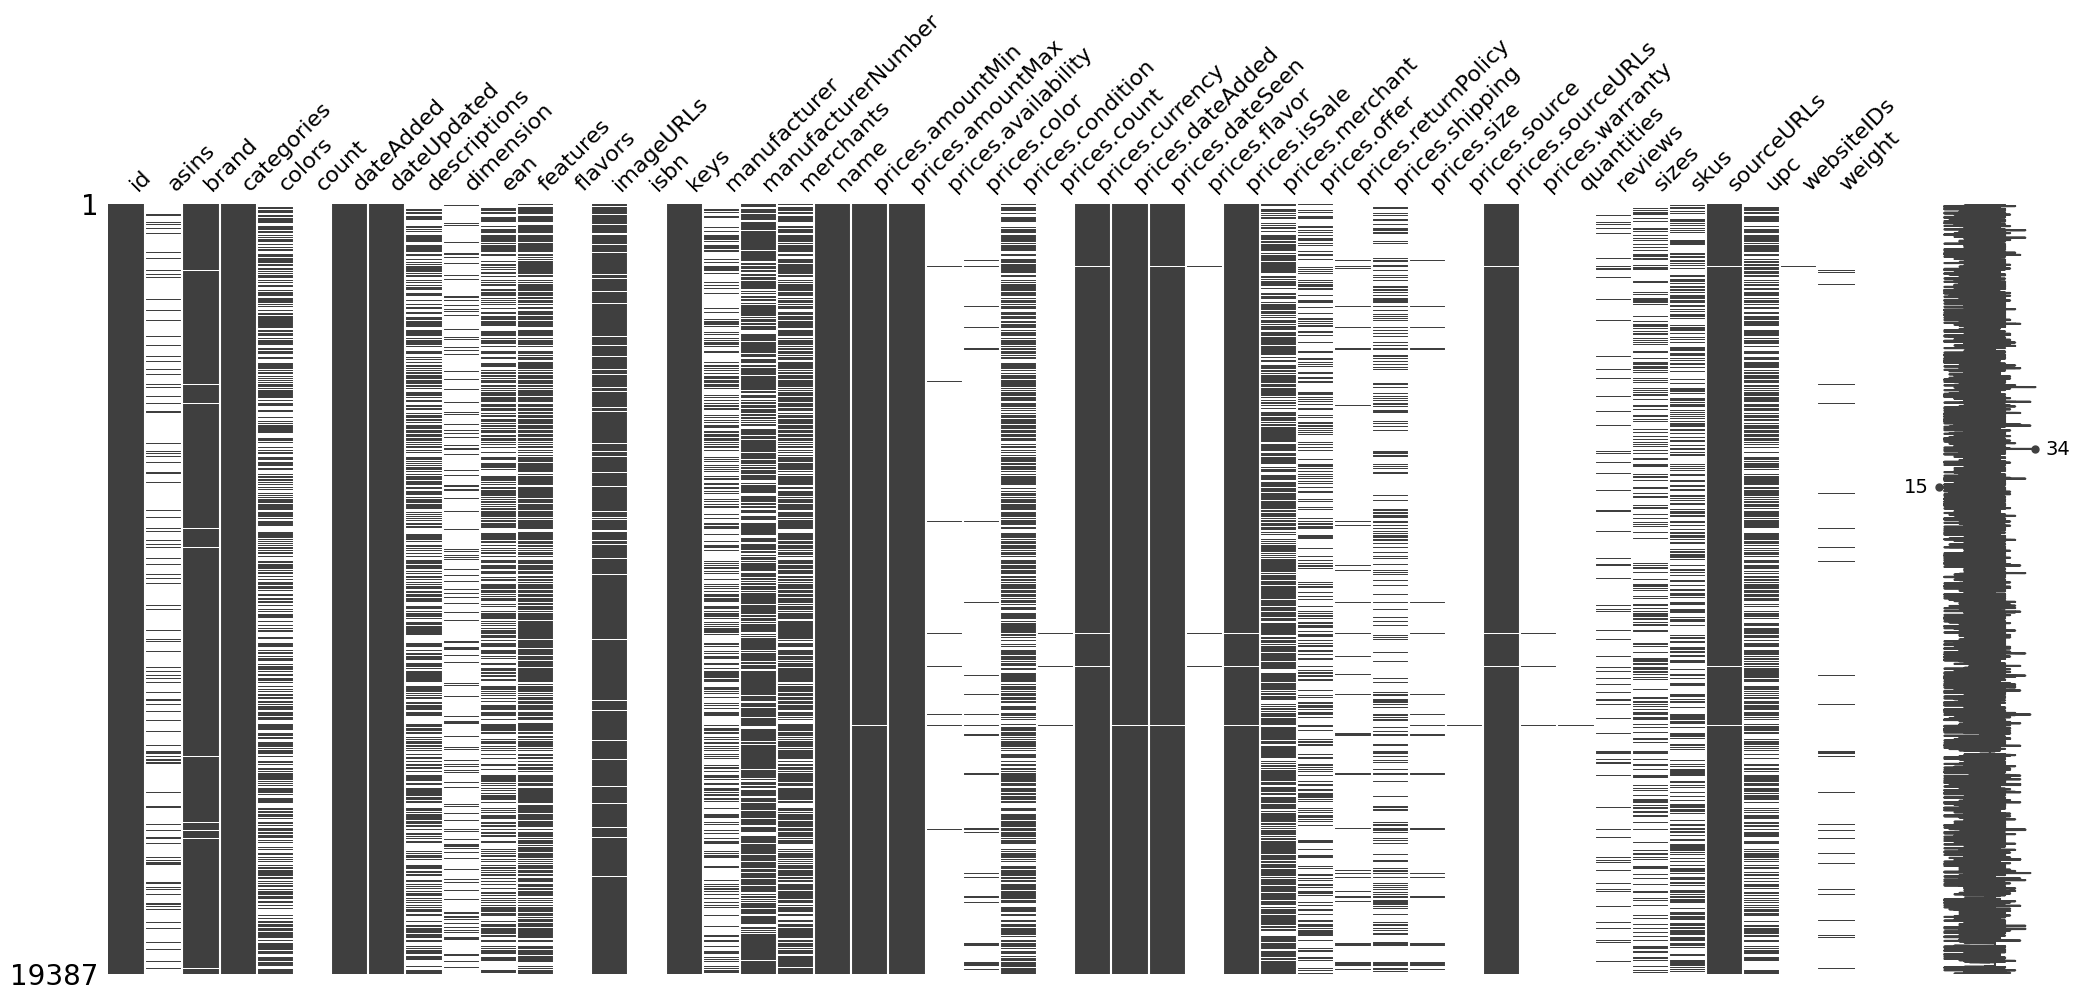

In [42]:
import missingno as msno

# Visualize missing data for df_women
msno.matrix(df_women)

# Visualize missing data for df_men
msno.matrix(df_men)


## Step 1b. : Cleaning the dataset

Due to the huge number of null values as well as the insignificance these columns have on our analysis, we will be dropping the columns: 
`asins`, `count`, `dimension`, `ean`, `flavors`, `isbn`, `prices.availability`, `prices.color`, `prices.count`, `prices.returnPolicy`, `prices.shipping`, `prices.size`, `prices.source`, `prices.warranty`, `quantities`, `reviews`, `skus`, `websiteIDs`, `weight`. 


#### Further Null value analysis 
Before dropping null values, I want to further explore some columns to see whether they can aid in our analysis

In [43]:
# List of columns to select for further inspection
columns_of_interest = [
    'brand',
    'descriptions',
    'features',
    'imageURLs',
    'manufacturer',
    'manufacturerNumber',
    'merchants',
    'prices.offer',
    'sizes',
    'sourceURLs',
    'upc'
]
df_selected = df_women[columns_of_interest]
df_selected.head(10)

,brand,descriptions,features,imageURLs,manufacturer,manufacturerNumber,merchants,prices.offer,sizes,sourceURLs,upc
0,Zoot,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""sourceU...","[{""key"":""Season"",""value"":[""All-Season""]},{""key...",https://i5.walmartimages.com/asr/e04c07b2-5222...,Zoot,Z130103201090,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""name"":""...",CLEARANCE USD 178.01,"10,9",https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN
1,Zoot,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""sourceU...","[{""key"":""Season"",""value"":[""All-Season""]},{""key...",https://i5.walmartimages.com/asr/e04c07b2-5222...,Zoot,Z130103201090,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""name"":""...",CLEARANCE USD 178.01,"10,9",https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN
2,Zoot,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""sourceU...","[{""key"":""Season"",""value"":[""All-Season""]},{""key...",https://i5.walmartimages.com/asr/e04c07b2-5222...,Zoot,Z130103201090,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""name"":""...",CLEARANCE USD 174.01,"10,9",https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN
3,Zoot,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""sourceU...","[{""key"":""Season"",""value"":[""All-Season""]},{""key...",https://i5.walmartimages.com/asr/e04c07b2-5222...,Zoot,Z130103201090,"[{""dateSeen"":[""2016-11-11T09:49:00Z""],""name"":""...",CLEARANCE USD 170.02,"10,9",https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...,NaN
4,Wild Pair,"[{""dateSeen"":[""2016-11-16T12:56:36Z""],""sourceU...","[{""key"":""Heel Height"",""value"":[""High (3 in. an...",https://i5.walmartimages.com/asr/8b2c73f5-939f...,Wild Pair,COLFAX-COG,"[{""dateSeen"":[""2016-11-16T12:56:36Z""],""name"":""...",CLEARANCE USD 63.02,"8.5,7,7.5,8",https://www.walmart.com/ip/Wild-Pair-Colfax-Wo...,7.63181E+11
5,Wild Pair,"[{""dateSeen"":[""2016-11-16T12:56:36Z""],""sourceU...","[{""key"":""Heel Height"",""value"":[""High (3 in. an...",https://i5.walmartimages.com/asr/8b2c73f5-939f...,Wild Pair,COLFAX-COG,"[{""dateSeen"":[""2016-11-16T12:56:36Z""],""name"":""...",CLEARANCE USD 74.01,"8.5,7,7.5,8",https://www.walmart.com/ip/Wild-Pair-Colfax-Wo...,7.63181E+11
6,Wild Pair,"[{""dateSeen"":[""2016-11-16T12:56:36Z""],""sourceU...","[{""key"":""Heel Height"",""value"":[""High (3 in. an...",https://i5.walmartimages.com/asr/8b2c73f5-939f...,Wild Pair,COLFAX-COG,"[{""dateSeen"":[""2016-11-16T12:56:36Z""],""name"":""...",CLEARANCE USD 74.01,"8.5,7,7.5,8",https://www.walmart.com/ip/Wild-Pair-Colfax-Wo...,7.63181E+11
7,Sutton Studio,NaN,"[{""key"":""Style"",""value"":[""Suit jackets""]},{""ke...",http://c.shld.net/rpx/i/s/pi/mp/10154715/prod_...,NaN,MY-H96G-DSBB,NaN,NaN,8,http://www.sears.com/content/pdp/products/pric...,NaN
8,Sutton Studio,NaN,"[{""key"":""Style"",""value"":[""Suit jackets""]},{""ke...",http://c.shld.net/rpx/i/s/pi/mp/10154715/prod_...,NaN,MY-H96G-DSBB,NaN,NaN,8,http://www.sears.com/content/pdp/products/pric...,NaN
9,LaLeela.com,NaN,"[{""key"":""Color"",""value"":[""Purple""]}]",http://c.shld.net/rpx/i/s/pi/mp/13484/prod_144...,NaN,128869,NaN,NaN,NaN,http://www.sears.com/content/pdp/products/pric...,NaN


### Dropping columns.
From the above view, we can see that `brand` and `manufacturer` have contain the same descriptions with manufacturer having more nulls than the brand columns; so, we'll drop the `manufacturer` column and keep `manufacturerNumber` and associate that with `brand`. We will also be dropping `descriptions`, `features`, `imageURLS`, `merchants`, `prices.offer`, `upc` mainly because most of these columns consist of values wrapped in dictionaries that can be found in other columns. we will extract the merchant company through which products were purchased from `sourceURLS`. Given that both data sets are identical and needed for comparison, we will perform the same cleaning tasks on both.

In [44]:
# Set the threshold for null values
drop_columns = ['asins','count', 'keys',
         'descriptions', 'dimension', 'ean', 'features',
        'flavors', 'imageURLs', 'isbn',  'manufacturer',
        'merchants',  'prices.availability', 'prices.color',
        'prices.dateAdded','prices.count',  'prices.flavor', 
         'prices.offer', 'prices.returnPolicy',
        'prices.shipping', 'prices.size', 'prices.source',
        'prices.warranty', 'quantities', 'reviews', 'sizes', 'skus',
        'sourceURLs', 'upc', 'websiteIDs', 'weight']

# Ensure we only drop columns that exist in the DataFrame
columns_to_drop_women = [col for col in drop_columns if col in df_women.columns]
columns_to_drop_men = [col for col in drop_columns if col in df_men.columns]

# Drop the specified columns from both DataFrames
df_women_cleaned = df_women.drop(columns=columns_to_drop_women)
df_men_cleaned = df_men.drop(columns=columns_to_drop_men)

# Print the number of columns dropped and remaining for each DataFrame
print("Number of columns dropped from df_women:", len(columns_to_drop_women))
print("Number of columns remaining in df_women:", df_women_cleaned.shape[1])

print("Number of columns dropped from df_men:", len(columns_to_drop_men))
print("Number of columns remaining in df_men:", df_men_cleaned.shape[1])

# Display the remaining columns in both DataFrames
print("\nColumns in df_women after dropping:")
print(df_women_cleaned.columns)

print("\nColumns in df_men after dropping:")
print(df_men_cleaned.columns)

Number of columns dropped from df_women: 31
Number of columns remaining in df_women: 16
Number of columns dropped from df_men: 31
Number of columns remaining in df_men: 16

Columns in df_women after dropping:
Index(['id', 'brand', 'categories', 'colors', 'dateAdded', 'dateUpdated',
       'manufacturerNumber', 'name', 'prices.amountMin', 'prices.amountMax',
       'prices.condition', 'prices.currency', 'prices.dateSeen',
       'prices.isSale', 'prices.merchant', 'prices.sourceURLs'],
      dtype='object')

Columns in df_men after dropping:
Index(['id', 'brand', 'categories', 'colors', 'dateAdded', 'dateUpdated',
       'manufacturerNumber', 'name', 'prices.amountMin', 'prices.amountMax',
       'prices.condition', 'prices.currency', 'prices.dateSeen',
       'prices.isSale', 'prices.merchant', 'prices.sourceURLs'],
      dtype='object')


In [45]:
df_women_cleaned.head()

,id,brand,categories,colors,dateAdded,dateUpdated,manufacturerNumber,name,prices.amountMin,prices.amountMax,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.sourceURLs
0,AVpfBXx21cnluZ0-cKxs,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes","Blue,Multicolor",2016-11-11T09:49:00Z,2016-11-11T09:49:00Z,Z130103201090,Zoot Tt Trainer 2.0 Round Toe Synthetic Sne...,71.99,71.99,NaN,USD,2016-11-02T00:00:00Z,TRUE,NaN,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...
1,AVpfBXx21cnluZ0-cKxs,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes","Blue,Multicolor",2016-11-11T09:49:00Z,2016-11-11T09:49:00Z,Z130103201090,Zoot Tt Trainer 2.0 Round Toe Synthetic Sne...,250,250,new,USD,2016-10-27T00:00:00Z,FALSE,ApparelSave - Walmart.com,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...
2,AVpfBXx21cnluZ0-cKxs,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes","Blue,Multicolor",2016-11-11T09:49:00Z,2016-11-11T09:49:00Z,Z130103201090,Zoot Tt Trainer 2.0 Round Toe Synthetic Sne...,75.99,75.99,new,USD,2016-10-27T00:00:00Z,TRUE,ApparelSave - Walmart.com,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...
3,AVpfBXx21cnluZ0-cKxs,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes","Blue,Multicolor",2016-11-11T09:49:00Z,2016-11-11T09:49:00Z,Z130103201090,Zoot Tt Trainer 2.0 Round Toe Synthetic Sne...,79.98,79.98,new,USD,2016-11-09T00:00:00Z,TRUE,ApparelSave - Walmart.com,https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...
4,AVpfEqFRLJeJML431x7w,Wild Pair,"Shoes,Women's Shoes,Clothing,All Women's Shoes",Brown,2016-11-16T12:56:36Z,2016-11-16T12:56:36Z,COLFAX-COG,Wild Pair Colfax Women Peep-toe Synthetic Bro...,26.98,26.98,NaN,USD,2016-11-09T00:00:00Z,TRUE,NaN,https://www.walmart.com/ip/Wild-Pair-Colfax-Wo...


#### Extracting merchant name from `prices.sourceURLs` for both data sets.

Let's first drop all null values in the `prices.sourceURLs' column in both data sets.

In [46]:
# Dropping rows with null values in 'prices.sourceURLs'
df_women_cleaned = df_women_cleaned.dropna(subset=['prices.sourceURLs'])
df_men_cleaned = df_men_cleaned.dropna(subset=['prices.sourceURLs'])

The `clean_url` function is designed to remove specific escape sequences from URLs, ensuring they are in a standardized format. It identifies and replaces patterns like (\\n\\n\\n\\n\\n\\n\\nhttps:// and \[\{"sourceURLs":\["http://) with their cleaned equivalents. 

After cleaning, the `extract_merchant_name` function processes these URLs to extract the base domain name, which represents the merchant. It uses the urlparse library to parse the URL, trims common subdomains (like www. or shop.), and logs any URLs it cannot process into a list of unprocessable URLs. These unprocessable URLs are then saved into separate CSV files for both women’s and men’s datasets, providing a record of URLs that could not be cleaned or parsed correctly. The cleaned and processed URLs are stored in new columns `merchant_source`, allowing for verification and further analysis.

After verification, `prices.sourceURLs` columns are dropped from both datasets.

In [47]:
from urllib.parse import urlparse
def clean_url(url):
    """Clean the URL by removing specific escape sequences."""
    if isinstance(url, str):
        # Remove specific escape sequences
        url = url.replace('\\\\n\\\\n\\\\n\\\\n\\\\n\\\\n\\\\n', 'https://')
        url = url.replace(r'\[\{"sourceURLs":\[\"', 'https://')
        return url
    return url

def extract_merchant_name(url, log_list):
    """Extracts merchant name from the URL and logs unprocessable URLs."""
    if isinstance(url, str):
        parsed_url = urlparse(url)
        domain = parsed_url.netloc

        if domain.startswith(('www.', 'fr.', 'shop.', 'm.', 'www1.')):
            domain = domain.split('.', 1)[1]

        base_domain = domain.split('.')[0]

        if not base_domain or len(base_domain) <= 2:
            log_list.append(f"Unprocessable URL: {url}, Parsed domain: {domain}")
            return "Unknown"

        return base_domain

    log_list.append(f"Invalid URL (not a string): {url}")
    return "Unknown"

# Apply clean_url function to clean the URLs in the DataFrames
df_women_cleaned['prices.sourceURLs'] = df_women_cleaned['prices.sourceURLs'].apply(clean_url)
df_men_cleaned['prices.sourceURLs'] = df_men_cleaned['prices.sourceURLs'].apply(clean_url)

# Lists to keep track of unprocessed URLs for both DataFrames
unprocessed_urls_women = []
unprocessed_urls_men = []

# Extract merchant names from the cleaned URLs
df_women_cleaned['merchant_source'] = df_women_cleaned['prices.sourceURLs'].apply(lambda url: extract_merchant_name(url, unprocessed_urls_women))
df_men_cleaned['merchant_source'] = df_men_cleaned['prices.sourceURLs'].apply(lambda url: extract_merchant_name(url, unprocessed_urls_men))

# Define the specific regex pattern to match the special cases
pattern = r'\\\\n\\\\n\\\\n\\\\n\\\\n\\\\n\\\\nhttps://|\[\{"sourceURLs":\[\"'

# Filter the DataFrames to identify rows with special patterns
special_case_women = df_women_cleaned[df_women_cleaned['prices.sourceURLs'].str.contains(pattern, regex=True)]
special_case_men = df_men_cleaned[df_men_cleaned['prices.sourceURLs'].str.contains(pattern, regex=True)]

# Convert the lists of unprocessed URLs to DataFrames
unprocessed_urls_women_df = pd.DataFrame(unprocessed_urls_women, columns=['UnprocessedURLs'])
unprocessed_urls_men_df = pd.DataFrame(unprocessed_urls_men, columns=['UnprocessedURLs'])

# Save the unprocessed URLs to separate CSV files
unprocessed_urls_women_df.to_csv('unprocessed_urls_women.csv', index=False)
unprocessed_urls_men_df.to_csv('unprocessed_urls_men.csv', index=False)

In [48]:
# Displaying the first few rows to check results
print("Women's DataFrame:")
print(df_women_cleaned[['prices.sourceURLs', 'merchant_source']].head())

print("\nMen's DataFrame:")
print(df_men_cleaned[['prices.sourceURLs',  'merchant_source']].head())

Women's DataFrame:
                                   prices.sourceURLs merchant_source
0  https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...         walmart
1  https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...         walmart
2  https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...         walmart
3  https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0...         walmart
4  https://www.walmart.com/ip/Wild-Pair-Colfax-Wo...         walmart

Men's DataFrame:
                                   prices.sourceURLs merchant_source
0  https://www.walmart.com/ip/Josmo-8190-Plain-In...         walmart
1  https://www.walmart.com/ip/Josmo-8190-Plain-In...         walmart
2  http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...         walmart
3  http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...         walmart
4  http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...         walmart


#### Data validation
Here we check to see how many urls were processed and cleaned in each dataset.

In [49]:
# Check how many URLs were unprocessed and print a sample
print(f"\n Number of unprocessed URLs for women: {len(unprocessed_urls_women)}")
print("Sample of unprocessed URLs for women:")
print(unprocessed_urls_women_df.head())

print(f"\nNumber of unprocessed URLs for men: {len(unprocessed_urls_men)}")
print("Sample of unprocessed URLs for men:")
print(unprocessed_urls_men_df.head())

# Print unprocessed URLs for verification
print("\nUnprocessed URLs (Women):")
print(unprocessed_urls_women)

print("\nUnprocessed URLs (Men):")
print(unprocessed_urls_men)


 Number of unprocessed URLs for women: 0
Sample of unprocessed URLs for women:
Empty DataFrame
Columns: [UnprocessedURLs]
Index: []

Number of unprocessed URLs for men: 6
Sample of unprocessed URLs for men:
                                     UnprocessedURLs
0  Unprocessable URL: [{"sourceURLs":["http://www...
1  Unprocessable URL: [{"sourceURLs":["http://www...
2    Unprocessable URL: 6.16316E+11, Parsed domain: 
3    Unprocessable URL: 6.16316E+11, Parsed domain: 
4  Unprocessable URL: [{"sourceURLs":["http://www...

Unprocessed URLs (Women):
[]

Unprocessed URLs (Men):
['Unprocessable URL: [{"sourceURLs":["http://www.shoes.com/mens-wolverine-guardian-wolverine-6-inch-carbonmax-safety-toe-work-boot-brown-p2_id79736"],"value":"111848"}], Parsed domain: ', 'Unprocessable URL: [{"sourceURLs":["http://www.shoes.com/mens-wolverine-guardian-wolverine-6-inch-carbonmax-safety-toe-work-boot-brown-p2_id79736"],"value":"111848"}], Parsed domain: ', 'Unprocessable URL: 6.16316E+11, Parsed doma

Only 6 urls weren't cleaned in the men's dataset. I inspected the 6 urls and manually copied their merchant name.

### Dropping `prices.sourceURLs` columns, verifying and saving file for further analysis and visualizations in Tableau.

In [50]:
# Drop the 'prices.sourceURLs' column from both cleaned DataFrames
drop_columns = ['prices.sourceURLs','prices.merchant']
df_women_cleaned = df_women_cleaned.drop(columns=drop_columns)
df_men_cleaned = df_men_cleaned.drop(columns=drop_columns)

## Step 2: Concatenating both datasets for further cleaning.
Further grouping and standardizing, converting data types and trimming of dataset for our analysis. 
- Perform a multivariate analysis 
- Tableau visualization
- modeling

In [51]:
# Combine both datasets if needed
df = pd.concat([df_women_cleaned, df_men_cleaned], ignore_index=True)
df.head()

,id,brand,categories,colors,dateAdded,dateUpdated,manufacturerNumber,name,prices.amountMin,prices.amountMax,prices.condition,prices.currency,prices.dateSeen,prices.isSale,merchant_source
0,AVpfBXx21cnluZ0-cKxs,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes","Blue,Multicolor",2016-11-11T09:49:00Z,2016-11-11T09:49:00Z,Z130103201090,Zoot Tt Trainer 2.0 Round Toe Synthetic Sne...,71.99,71.99,NaN,USD,2016-11-02T00:00:00Z,TRUE,walmart
1,AVpfBXx21cnluZ0-cKxs,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes","Blue,Multicolor",2016-11-11T09:49:00Z,2016-11-11T09:49:00Z,Z130103201090,Zoot Tt Trainer 2.0 Round Toe Synthetic Sne...,250,250,new,USD,2016-10-27T00:00:00Z,FALSE,walmart
2,AVpfBXx21cnluZ0-cKxs,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes","Blue,Multicolor",2016-11-11T09:49:00Z,2016-11-11T09:49:00Z,Z130103201090,Zoot Tt Trainer 2.0 Round Toe Synthetic Sne...,75.99,75.99,new,USD,2016-10-27T00:00:00Z,TRUE,walmart
3,AVpfBXx21cnluZ0-cKxs,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes","Blue,Multicolor",2016-11-11T09:49:00Z,2016-11-11T09:49:00Z,Z130103201090,Zoot Tt Trainer 2.0 Round Toe Synthetic Sne...,79.98,79.98,new,USD,2016-11-09T00:00:00Z,TRUE,walmart
4,AVpfEqFRLJeJML431x7w,Wild Pair,"Shoes,Women's Shoes,Clothing,All Women's Shoes",Brown,2016-11-16T12:56:36Z,2016-11-16T12:56:36Z,COLFAX-COG,Wild Pair Colfax Women Peep-toe Synthetic Bro...,26.98,26.98,NaN,USD,2016-11-09T00:00:00Z,TRUE,walmart


### Selecting columns needed for the price prediction model and cleaning them further:

- `brand` - convert all entries to upper case and trim spacing
- `categories` - create a new column `shoe_category` to categorize "Women's Shoes" and "Men's Shoes"
- `dateAdded`,`prices.dateSeen`, `dateUpdated` - convert them to date values
- `colors` -  fill missing values with a placeholder such as "Unknown" or "No Color". This will treat missing values as a separate category.
- `prices.condition` - Since "new" is the most common value, we will fill missing values with "new". 
- `name` - with over 18,000 unique entries, high cardinality column will be great to add detail and precision to the model. 
- `prices.amountMin`, `prices.amountMax` - summary statistics of average price and remove outliers. Calculate the Log-transformed scale
- `avg_price` - This column will be created as average of min and max price to be the target variable in the pricing model. Assuming prices.amountMin and prices.amountMax represent the range of prices, we will calculate the average of these two for a more accurate mean price.
- `prices.currency` - remove nulls and categorize if needed
- `prices.isSale` - standardize and categorize into TRUE or FALSE
- `manufacturerNumber` - fill nan values with "Unknown".
`merchant_source` - This is the new column that was created by extracting URLS. standardize the columns.


### Getting unique counts in column of interest.

In [52]:
columns_of_interest = [
    'brand', 'categories', 'dateAdded','prices.dateSeen', 'dateUpdated', 'colors','prices.condition',
    'name','prices.amountMin', 'prices.amountMax', 'prices.currency', 'prices.isSale','merchant_source'
]
def get_value_counts(df, columns):
    for column in columns:
        print(f"Value counts for {column}:")
        print(df[column].value_counts())
        print("\n")


get_value_counts(df, columns_of_interest )

Value counts for brand:
brand
Nike              2077
Ralph Lauren      1240
PUMA               629
VANS               573
New Balance        522
                  ... 
Loro Piana           1
Summitfashions       1
NIKE SB              1
Corona Tools         1
Xray, XRay           1
Name: count, Length: 3531, dtype: int64


Value counts for categories:
categories
All Men's Shoes,Shoes,Men's Shoes,Clothing                                                                                             3699
Shoes,Women's Shoes,Clothing,All Women's Shoes                                                                                         2887
Clothing,Shoes,Women's Shoes,All Women's Shoes                                                                                         2309
Shoes,Clothing,Women's Shoes,All Women's Shoes                                                                                         2062
Clothing,Shoes,Men's Shoes,All Men's Shoes                                 

**`Categories`:** Grouping all variations of men and women's shoes from categories column to `shoe_category`.

In [53]:
def categorize_shoes(category):
    '''Categorizing men and women shoes'''
    if 'Women' in category or 'women' in category:
        return "Women's Shoes"
    elif 'Men' in category or 'men' in category:
        return "Men's Shoes"
    else:
        return "Other"

# Apply the categorization function to create a new column
df['shoe_category'] = df['categories'].apply(categorize_shoes)
value_counts = df['shoe_category'].value_counts() 
print(value_counts)

print(df[['categories', 'shoe_category']])

shoe_category
Women's Shoes    20120
Men's Shoes      18214
Name: count, dtype: int64
                                              categories  shoe_category
0         Shoes,Clothing,Women's Shoes,All Women's Shoes  Women's Shoes
1         Shoes,Clothing,Women's Shoes,All Women's Shoes  Women's Shoes
2         Shoes,Clothing,Women's Shoes,All Women's Shoes  Women's Shoes
3         Shoes,Clothing,Women's Shoes,All Women's Shoes  Women's Shoes
4         Shoes,Women's Shoes,Clothing,All Women's Shoes  Women's Shoes
...                                                  ...            ...
38329    Clothing, Shoes & Accessories,Men's Shoes,Boots    Men's Shoes
38330         Clothing,Shoes,Men's Shoes,All Men's Shoes    Men's Shoes
38331  Women's Sunglasses,Sunglasses,Bags & Accessori...  Women's Shoes
38332  Women's Sunglasses,Sunglasses,Bags & Accessori...  Women's Shoes
38333  Women's Sunglasses,Sunglasses,Bags & Accessori...  Women's Shoes

[38334 rows x 2 columns]


**`prices.condition`:** Grouping all variations of new as New, filling missing values with "New" and further groupings.

This function `group_conditions` is written to categorize shoe conditions into three main groups: "New", "Used", and specific conditions such as 'New without tags', 'New with defects', and 'New without box'. It treats any `NaN` values or unspecified conditions as "New". This ensures a consistent grouping of the shoe conditions for further analysis.



In [54]:
def group_conditions(condition):
    '''Grouping shoe conditions'''
    if pd.isnull(condition) or condition in ['new', 'New with box', 'New with tags', 'Brand New']:
        return "New"
    elif condition in ['Pre-owned', 'Used']:
        return "Used"
    elif condition in ['New without tags', 'New with defects', 'New without box']:
        return condition  # Preserve these specific new conditions
    else:
        return "New"

# Apply the categorization function to create a new column
df['prices.condition'] = df['prices.condition'].apply(group_conditions)
value_counts = df['prices.condition'].value_counts() 
print(value_counts)

prices.condition
New                 37183
New without box       442
Used                  333
New without tags      249
New with defects      127
Name: count, dtype: int64


**`prices.currency`**: Replacing non-matching currency values with USD as they are mostly American brands carried by American Merchants. Allowed currencies are (USD, CAD, AUD, EUR, GBP) in the currency column, we use the apply method along with a lambda function to replace any non-matching values with USD. 

In [55]:
allowed_currencies = ['USD', 'AUD', 'CAD', 'EUR', 'GBP']

def filter_currencies(value):
    return value if value in allowed_currencies else 'USD'

df['prices.currency'] = df['prices.currency'].apply(filter_currencies)

value_counts = df['prices.currency'].value_counts() 
print(value_counts)

prices.currency
USD    36729
CAD      941
AUD      456
EUR      171
GBP       37
Name: count, dtype: int64


**`prices.isSale`:** standardize and categorize to TRUE or FALSE

The `to_boolean_upper` function ensures that all values are converted to booleans and then to uppercase strings 'TRUE' or 'FALSE'. The function to_boolean_upper handles different types of inputs (strings, booleans, and other types) to ensure consistent conversion.

In [56]:
def to_boolean_upper(value):
    # Convert string representations of booleans to actual booleans
    if isinstance(value, str):
        value = value.strip().lower()
        if value in ['false', '0', '', 'none','False']:
            return 'FALSE'
        elif value in ['true', '1', 'True']:
            return 'TRUE'
    
    # Convert non-string values to booleans directly
    if isinstance(value, bool):
        return 'TRUE' if value else 'FALSE'
    
    # Handle other cases (e.g., URLs or unexpected types)
    return None
# Apply the function to the column
df['prices.isSale'] = df['prices.isSale'].apply(to_boolean_upper)


value_counts = df['prices.isSale'].value_counts()
print(value_counts)

prices.isSale
FALSE    26325
TRUE     12003
Name: count, dtype: int64


- `dateAdded`,`prices.dateSeen`, `dateUpdated` - convert to date values.


In [57]:
# Attempt to convert the column with logging for issues
def convert_date(date):
    try:
        return pd.to_datetime(date, errors='raise')
    except Exception as e:
        print(f"Error converting date: {date} - {e}")
        return pd.NaT

# Apply the conversion function to the dates
df['prices.dateSeen'] = df['prices.dateSeen'].apply(convert_date)
df['dateAdded'] = df['dateAdded'].apply(convert_date)
df['dateUpdated'] = df['dateUpdated'].apply(convert_date)


Error converting date: FREE SHIPPING & FREE RETURNS Join SHOES.com as an Elite member for 365 days of Next Day shipping for a low, one-time payment of $44.95. DETAILS - Unknown datetime string format, unable to parse: FREE SHIPPING & FREE RETURNS Join SHOES.com as an Elite member for 365 days of Next Day shipping for a low, one-time payment of $44.95. DETAILS, at position 0


- `prices.amountMin`,`prices.amountMax` - convert to numeric and drop the 6 null values in both columns. 
- `avg_price` - create a new column for average price
- `merchant_source` - standardize to upper case
- `colors` - filling nan values with "Unknown"
- `manufacturerNumber` - fill nan values with "Unknown".

In [58]:
#convert date values
#df['dateAdded'] = pd.to_datetime(df['dateAdded'], errors='coerce')
#df['prices.dateSeen'] = pd.to_datetime(df['prices.dateSeen'], errors='coerce')
#df['dateUpdated'] = pd.to_datetime(df['dateUpdated'], errors='coerce')

# Convert min price to numeric and drop nulls - 
df['prices.amountMin'] = pd.to_numeric(df['prices.amountMin'], errors='coerce')
df.dropna(subset=['prices.amountMin'], inplace=True)

# Convert max price to numeric and drop nulls
df['prices.amountMax'] = pd.to_numeric(df['prices.amountMax'], errors='coerce')
df.dropna(subset=['prices.amountMin'], inplace=True)

#calculating average price
df['avg_price'] = (df['prices.amountMin'] + df['prices.amountMax']) / 2

#standardize brands
df["brand"] = df["brand"].str.upper()
df["brand"] = df["brand"].fillna("Unknown")

#merchant_source
df["merchant_source"] = df["merchant_source"].str.upper()

#colors
df['colors'] = df['colors'].fillna('Unknown')

#manufacturerNumber
df["manufacturerNumber"] = df["manufacturerNumber"].fillna('Unknown')

### Inspecting cleaned and combined datasets

In [59]:
df.head()

,id,brand,categories,colors,dateAdded,dateUpdated,manufacturerNumber,name,prices.amountMin,prices.amountMax,prices.condition,prices.currency,prices.dateSeen,prices.isSale,merchant_source,shoe_category,avg_price
0,AVpfBXx21cnluZ0-cKxs,ZOOT,"Shoes,Clothing,Women's Shoes,All Women's Shoes","Blue,Multicolor",2016-11-11 09:49:00+00:00,2016-11-11 09:49:00+00:00,Z130103201090,Zoot Tt Trainer 2.0 Round Toe Synthetic Sne...,71.99,71.99,New,USD,2016-11-02 00:00:00+00:00,TRUE,WALMART,Women's Shoes,71.99
1,AVpfBXx21cnluZ0-cKxs,ZOOT,"Shoes,Clothing,Women's Shoes,All Women's Shoes","Blue,Multicolor",2016-11-11 09:49:00+00:00,2016-11-11 09:49:00+00:00,Z130103201090,Zoot Tt Trainer 2.0 Round Toe Synthetic Sne...,250.00,250.00,New,USD,2016-10-27 00:00:00+00:00,FALSE,WALMART,Women's Shoes,250.00
2,AVpfBXx21cnluZ0-cKxs,ZOOT,"Shoes,Clothing,Women's Shoes,All Women's Shoes","Blue,Multicolor",2016-11-11 09:49:00+00:00,2016-11-11 09:49:00+00:00,Z130103201090,Zoot Tt Trainer 2.0 Round Toe Synthetic Sne...,75.99,75.99,New,USD,2016-10-27 00:00:00+00:00,TRUE,WALMART,Women's Shoes,75.99
3,AVpfBXx21cnluZ0-cKxs,ZOOT,"Shoes,Clothing,Women's Shoes,All Women's Shoes","Blue,Multicolor",2016-11-11 09:49:00+00:00,2016-11-11 09:49:00+00:00,Z130103201090,Zoot Tt Trainer 2.0 Round Toe Synthetic Sne...,79.98,79.98,New,USD,2016-11-09 00:00:00+00:00,TRUE,WALMART,Women's Shoes,79.98
4,AVpfEqFRLJeJML431x7w,WILD PAIR,"Shoes,Women's Shoes,Clothing,All Women's Shoes",Brown,2016-11-16 12:56:36+00:00,2016-11-16 12:56:36+00:00,COLFAX-COG,Wild Pair Colfax Women Peep-toe Synthetic Bro...,26.98,26.98,New,USD,2016-11-09 00:00:00+00:00,TRUE,WALMART,Women's Shoes,26.98


In [60]:
df.isnull().sum(), df.shape

(id                    0
 brand                 0
 categories            0
 colors                0
 dateAdded             0
 dateUpdated           0
 manufacturerNumber    0
 name                  0
 prices.amountMin      0
 prices.amountMax      0
 prices.condition      0
 prices.currency       0
 prices.dateSeen       0
 prices.isSale         0
 merchant_source       0
 shoe_category         0
 avg_price             0
 dtype: int64,
 (38328, 17))

## Step 3: Analyzing Price distributions
With all of our columns of interest haven been cleaned, and our dataset now has no null values, we can proceed with analyzing the price distributions. 

In [61]:
# Calculate statistics
mean_price = df['avg_price'].mean()
std_price = df['avg_price'].std()
min_price = df['avg_price'].min()
max_price = df['avg_price'].max()

print(f"Mean Price: {mean_price}")
print(f"Standard Deviation of Price: {std_price}")
print(f"Minimum Price: {min_price}")
print(f"Maximum Price: {max_price}")

Mean Price: 119.02249569505322
Standard Deviation of Price: 810.1623211088953
Minimum Price: 0.0
Maximum Price: 104350.0


Upon further examination of the dataset, we discovered that some items were jewelry instead of shoes, which accounts for the high standard deviation and the extreme maximum price of 104,350.0 (listed as "63.00 Cttw Round Cut Natural (f-g Color for PEACOCK DIAMONDS"). To ensure the analysis focuses solely on shoe pricing, all listings for items other than shoes will be removed.

### Average price distributions after jewelry and outlier removal
Focusing on shoes only, we only look at prices between 15 and 1295.

In [62]:
# Remove outliers and jewelry listings in avg_price
df = df[(df['avg_price'] > 10) & (df['avg_price'] < 1295)]

# Calculate statistics
mean_price = df['avg_price'].mean()
std_price = df['avg_price'].std()
min_price = df['avg_price'].min()
max_price = df['avg_price'].max()

print(f"Mean Price: {mean_price}")
print(f"Standard Deviation of Price: {std_price}")
print(f"Minimum Price: {min_price}")
print(f"Maximum Price: {max_price}")

Mean Price: 99.82857772070803
Standard Deviation of Price: 141.47853699623624
Minimum Price: 10.01
Maximum Price: 1275.0


Average price per brand

In [64]:
avgprice= df.groupby('brand')['avg_price'].mean()
avgprice

brand
1 WORLD SARONGS     16.390000
1031                44.510000
12 STEP GOLD        49.975000
14K CO.            171.441944
180S                29.118889
                      ...    
ZLYC               224.240000
ZOOT                53.142353
ZOOT SPORTS         64.950000
ZUMBA               82.500000
ZZZRT TRADERS       44.435000
Name: avg_price, Length: 3121, dtype: float64

Identify brands with the highest prices:

In [65]:
# Sort the average prices in descending order to find the brands with the highest prices
brands_with_highest_prices = avgprice.sort_values(ascending=False)
print("Brands with the highest prices:")
print(brands_with_highest_prices.head(20))  # Adjust the number inside head() for more or fewer brands


Brands with the highest prices:
brand
TECHNO-MARINE            1187.000000
QG                       1139.950000
MALONE SOULIERS          1100.000000
EBEL                     1099.000000
JUNGHANS                  979.770000
THEBEJEWELEDEGG RINGS     957.852000
IBRAGGIOTTI               916.196667
ALEXANDER WANG            865.000000
CHRISTIAN LOUBOUTIN       822.000000
TBJE WEDDING BANDS        819.785000
SOD                       809.370000
JEWELPLUS                 806.666667
NATIVE-BAY                765.990000
TISSOT                    757.134286
LES COPAINS               753.633333
SAINT LAURENT             726.250000
PINKO                     724.966667
CHLOE                     720.000000
BALENCIAGA                695.000000
MORPHIC                   680.605556
Name: avg_price, dtype: float64


### saving cleaned df to csv file

In [66]:
#saving to csv after filtering out prices over 1295 only. 
df.to_csv("shoes.csv",index=False)

#Final dataset rows and columns after cleaning
df.shape

(36213, 17)

We started with 38,432 rows combined and 47 rows. After cleaning and creating 2 new columns, we conclude cleaning with 36,213 rows in and ended with 17 columns. 